<a href="https://colab.research.google.com/github/ayush27072021/Web-Content-Analytics-Engine/blob/main/Data_extraction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Liberaries**

In [ ]:
#importing library
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from google.colab import files
import nltk
import string
import concurrent.futures

#Natural Language Toolkit for Python
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Mount Google Drive to access files stored there**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load URLs from an Excel File**

In [ ]:
#importing input file
df=pd.read_excel('/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/Input.xlsx')[['URL_ID','URL']]
df=df.iloc[0:150]
df

**Remove 'URL_ID' column as it's not needed for processing**

In [ ]:
df.drop('URL_ID',axis=1,inplace=True)

# **Setting up the directory to save the text files after scraping**

In [ ]:
import os

# Setup the directory where files will be saved
save_directory = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/"
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Loop Over each URL in the dataframe
url_id = 1
for url in df['URL']:
    try:
        # Setup the request header for HTTP request
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}
        page = requests.get(url, headers=headers)
        soup = BeautifulSoup(page.content, 'html.parser')

        # Check and extract content from the page
        content_items = soup.findAll(attrs={'class': 'td-post-content'})
        if not content_items:
            print(f"No content found for URL_ID {url_id}")
            continue
        content_text = content_items[0].text.replace('\xa0', " ").replace('\n', " ")

        # Check and extract title from the page
        title_items = soup.findAll(attrs={'class': 'entry-title'})
        if not title_items:
            print(f"No title found for URL_ID {url_id}")
            continue
        title_text = title_items[0].text.replace('\n', " ").replace('/', "")

        # Combine title and content for full text
        text = title_text + '.' + content_text

        # Save the combined text to a file
        filename = os.path.join(save_directory, f"{url_id}.txt")
        with open(filename, 'w') as f:
            f.write(text + '\n')  # Directly write the text string with a newline character.

        print(f"Processed and saved {filename}")
    except Exception as e:
        print(f"Error processing URL_ID {url_id}: {str(e)}")

    url_id += 1


Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/1.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/2.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/3.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/4.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/5.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/6.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/7.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/8.txt
Processed and saved /content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/9.txt
P

# **Data Analysis**

In [ ]:
#importing each text files for processing
text=pd.read_csv("/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/data extract to text/11.txt",header=None)

In [ ]:
# Display information about the DataFrame to understand its structure
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
 1   1       1 non-null      object
 2   2       1 non-null      object
 3   3       1 non-null      object
 4   4       1 non-null      object
 5   5       1 non-null      object
 6   6       1 non-null      object
 7   7       1 non-null      object
 8   8       1 non-null      object
 9   9       1 non-null      object
 10  10      1 non-null      object
 11  11      1 non-null      object
 12  12      1 non-null      object
 13  13      1 non-null      object
 14  14      1 non-null      object
 15  15      1 non-null      object
 16  16      1 non-null      object
 17  17      1 non-null      object
 18  18      1 non-null      object
 19  19      1 non-null      object
 20  20      1 non-null      object
 21  21      1 non-null      object
 22  22      1 non-null      object

In [ ]:
# Drop any extra created columns that are not needed for further analysis
text.drop(1,axis=1,inplace=True)

In [ ]:
# Ensure all data in the text DataFrame is treated as string type for consistent processing
text=text.astype(str)

In [ ]:
# Slpi text into sentences based on periods followed by spaces
import re
a=text[0].str.split('([\.]\s)',expand=False)#splitting text on '.'
b=a.explode()#converting to rows
b=pd.DataFrame(b)#creating data frame
b.columns=['abc']

In [ ]:
# Function to remove periods from each row to clean up sentences
def abcd(x):
    nopunc =[char for char in x if char != '.']
    return ''.join(nopunc)
b['abc']=b['abc'].apply(abcd)

In [ ]:
# Replace empty strings with NaN to clean the data, then drop these NaN values
c=b.replace('',np.nan,regex=True)
c=c.mask(c==" ")
c=c.dropna()
c.reset_index(drop=True,inplace=True)

In [ ]:
c

,abc
0,Efficient Supply Chain Assessment: Overcoming ...
1,ABSTRACT: The rapid development of the Interne...


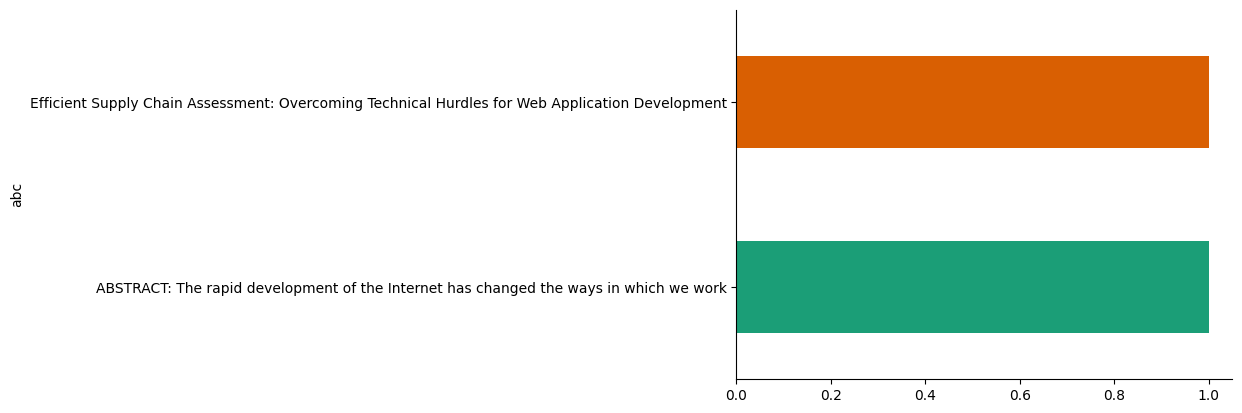

In [ ]:
# @title abc

from matplotlib import pyplot as plt
import seaborn as sns
c.groupby('abc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# List all punctuation for further text processing
punc=[punc for punc in string.punctuation]

In [ ]:
punc

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
# Function to load stopwords from a file, ensuring each stopword is read correctly
def read_stopwords(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as file:  # Using ISO-8859-1 as it's common for text files
        stopwords = [line.strip() for line in file if line.strip()]  # Removes any trailing newlines and ignores empty lines
    return stopwords

# Specifying the path for each stop words list
stopwords_auditor_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_Auditor.txt"
stopwords_currencies_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_Currencies.txt"
stopwords_datesandnumbers_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_DatesandNumbers.txt"
stopwords_generic_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_Generic.txt"
stopwords_genericlong_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_GenericLong.txt"
stopwords_geographic_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_Geographic.txt"
stopwords_names_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/StopWords-20240423T071015Z-001/StopWords/StopWords_Names.txt"

# Loading each stop words list using the function
StopWords_Auditor = read_stopwords(stopwords_auditor_path)
StopWords_Currencies = read_stopwords(stopwords_currencies_path)
StopWords_DatesandNumbers = read_stopwords(stopwords_datesandnumbers_path)
StopWords_Generic = read_stopwords(stopwords_generic_path)
StopWords_GenericLong = read_stopwords(stopwords_genericlong_path)
StopWords_Geographic = read_stopwords(stopwords_geographic_path)
StopWords_Names = read_stopwords(stopwords_names_path)

In [ ]:
# Function to process text: remove punctuation and filter out stopwords
def text_process(text):
    # Remove punctuation first
    nopunc = ''.join([char for char in text if char not in punc])
    # Now split the text into words and filter out stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in StopWords_Auditor and
                                                        word.lower() not in StopWords_Currencies and
                                                        word.lower() not in StopWords_DatesandNumbers and
                                                        word.lower() not in StopWords_Generic and
                                                        word.lower() not in StopWords_GenericLong and
                                                        word.lower() not in StopWords_Geographic and
                                                        word.lower() not in StopWords_Names])

In [ ]:
# Applying text processing to each row in DataFrame
c['abc']=c['abc'].apply(text_process)

In [ ]:
c

,abc
0,Efficient Supply Chain Assessment Overcoming T...
1,ABSTRACT rapid development Internet changed wa...


from matplotlib import pyplot as plt
import seaborn as sns
c.groupby('abc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

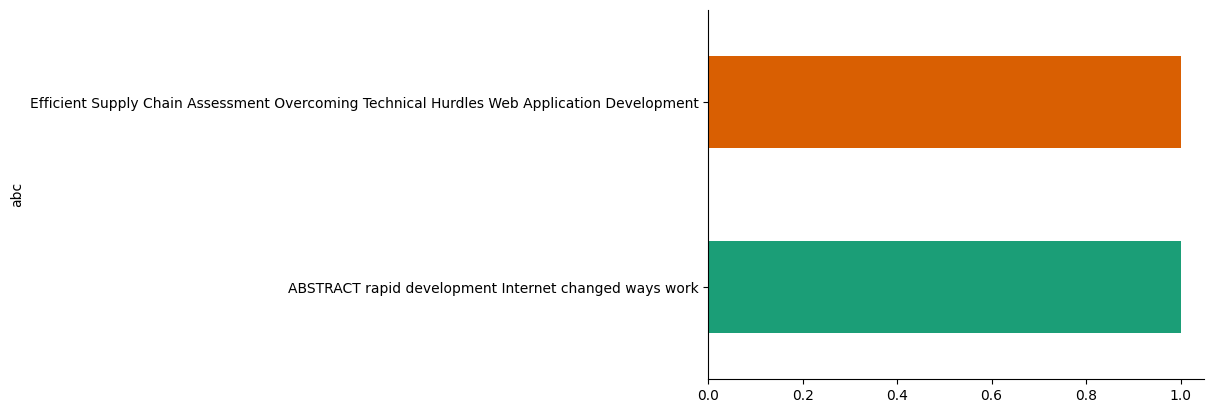

In [ ]:
# Display frequency of words using a horizontal bar chart
from matplotlib import pyplot as plt
import seaborn as sns
c.groupby('abc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Loading positive and negative words from files
def read_words(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as file:  # Using ISO-8859-1 as suggested for compatibility
        words = [line.strip() for line in file if line.strip()]  # Strip whitespace and skip empty lines
    return words

# Paths to the word files
positive_words_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/MasterDictionary-20240423T071037Z-001/MasterDictionary/positive-words.txt"
negative_words_path = "/content/drive/MyDrive/Test Assignment/Blackcoffer Data Science/MasterDictionary-20240423T071037Z-001/MasterDictionary/negative-words.txt"

# Load the words using the defined function
positive = read_words(positive_words_path)
negative = read_words(negative_words_path)

In [ ]:

# First, confirm 'positive' and 'negative' are lists of words. If they are, convert them to DataFrames.
# We create a DataFrame with a single column named 'abc', which will hold the words.

positive_df = pd.DataFrame(positive, columns=['abc'])
negative_df = pd.DataFrame(negative, columns=['abc'])

# Now apply the 'text_process' function to the 'abc' column of each DataFrame.
# Ensure your 'text_process' function is properly defined and accessible in your script.
positive_df['abc'] = positive_df['abc'].apply(text_process)
negative_df['abc'] = negative_df['abc'].apply(text_process)

**Detailed Data Processing and Metric computation steps**

In [ ]:
import string

# Convert the 'positive' list to a DataFrame
positive_df = pd.DataFrame(positive, columns=['word'])

# Now you can use DataFrame methods to process this DataFrame
length = positive_df.shape[0]
post = []

for i in range(length):
    # Extract the word and perform operations
    word = positive_df.iloc[i]['word']
    nopunc = [char for char in word if char not in string.punctuation and char != '+']
    nopunc = ''.join(nopunc)
    post.append(nopunc)

In [ ]:
import string

# Convert the 'negative' list to a DataFrame
negative_df = pd.DataFrame(negative, columns=['word'])

# Now you can use DataFrame methods to process this DataFrame
length = negative_df.shape[0]
neg = []

for i in range(length):
    # Extract the word and perform operations
    word = negative_df.iloc[i]['word']
    nopunc = [char for char in word if char not in string.punctuation and char != '+']
    nopunc = ''.join(nopunc)
    neg.append(nopunc)


In [ ]:
#importing tokenize library
from nltk.tokenize import word_tokenize

In [ ]:
txt_list=[]
length=c.shape[0]
for i in range(0,length):
  txt=' '.join([word for word in c.iloc[i]])
  txt_list.append(txt)

In [ ]:
#tokenization of text
tokenize_text=[]
for i in txt_list:

  tokenize_text+=(word_tokenize(i))

In [ ]:
print(tokenize_text)

['Efficient', 'Supply', 'Chain', 'Assessment', 'Overcoming', 'Technical', 'Hurdles', 'Web', 'Application', 'Development', 'ABSTRACT', 'rapid', 'development', 'Internet', 'changed', 'ways', 'work']


In [ ]:
len(tokenize_text)

17

1) Positive Score

In [ ]:
positive_score=0
for i in tokenize_text:
  if(i.lower() in post):
    positive_score+=1
print('Postive Score=', positive_score)

Postive Score= 3


2) Negative Score

In [ ]:
negative_score=0
for i in tokenize_text:
  if(i.lower() in neg):
    negative_score+=1
print('Negative Score=', negative_score)

Negative Score= 0


3) Polarity Score

In [ ]:
#Polarity Score = (Positive Score – Negative Score)/ ((Positive Score + Negative Score) + 0.000001)
Polarity_Score=(positive_score-negative_score)/((positive_score+negative_score)+0.000001)
print('Polarity Score=', Polarity_Score)

Polarity Score= 0.9999996666667778


4) Subjectivity Score

In [ ]:
#Subjectivity Score = (Positive Score + Negative Score)/ ((Total Words after cleaning) + 0.000001)
subjectiivity_score=(positive_score-negative_score)/((len(tokenize_text))+ 0.000001)
print('Subjectivity Score',subjectiivity_score)

Subjectivity Score 0.17647057785467188


5) Avg Sentence Length

In [ ]:
length=c.shape[0]
avg_length=[]
for i in range(0,length):
  avg_length.append(len(c['abc'].iloc[i]))
avg_senetence_length=sum(avg_length)/len(avg_length)
print('Average Sentence Length=', avg_senetence_length)

Average Sentence Length= 71.5


6) Percentage of Complex words

In [ ]:
vowels=['a','e','i','o','u']
import re
count=0
complex_Word_Count=0
for i in tokenize_text:
  x=re.compile('[es|ed]$')
  if x.match(i.lower()):
   count+=0
  else:
    for j in i:
      if(j.lower() in vowels ):
        count+=1
  if(count>2):
   complex_Word_Count+=1
  count=0


In [ ]:
Percentage_of_Complex_words=(complex_Word_Count/len(tokenize_text))*100
print('Percentage of Complex Words= ',Percentage_of_Complex_words)

Percentage of Complex Words=  47.05882352941176


7) Fog Index

In [ ]:
#Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)
Fog_Index = 0.4 * (avg_senetence_length + Percentage_of_Complex_words/100)
print('Fog Index= ',Fog_Index )

Fog Index=  28.788235294117648


8) Avg Number of Words Per Sentence

In [ ]:
length=c.shape[0]
avg_length=[]
for i in range(0,length):
  a=[word.split( ) for word in c.iloc[i]]
  avg_length.append(len(a[0]))
  a=0
#avg
avg_no_of_words_per_sentence=sum(avg_length)/length
print("Average Number of Words Per Sentence= ",avg_no_of_words_per_sentence)

Average Number of Words Per Sentence=  8.5


9) Complex Word Count

In [ ]:
vowels=['a','e','i','o','u']
import re
count=0
complex_Word_Count=0
for i in tokenize_text:
  x=re.compile('[es|ed]$')
  if x.match(i.lower()):
   count+=0
  else:
    for j in i:
      if(j.lower() in vowels ):
        count+=1
  if(count>2):
   complex_Word_Count+=1
  count=0
print('Complex Words Count=',  complex_Word_Count)

Complex Words Count= 8


10) Word Count

In [ ]:
word_count=len(tokenize_text)
print('Word Count= ', word_count)

Word Count=  17


11) Syllable Per Word

In [ ]:
vowels=['a','e','i','o','u']
import re
count=0
for i in tokenize_text:
  x=re.compile('[es|ed]$')
  if x.match(i.lower()):
   count+=0
  else:
    for j in i:
      if(j.lower() in vowels ):
        count+=1
syllable_count=count
print('Syllable Per Word= ',syllable_count)

Syllable Per Word=  44


12) Personal Pronouns

In [ ]:
pronouns=['i','we','my','ours','us' ]
import re
count=0
for i in tokenize_text:
  if i.lower() in pronouns:
   count+=1
personal_pronouns=count
print('Personal Pronouns= ',personal_pronouns )

Personal Pronouns=  0


13) Avg Word Length

In [ ]:
count=0
for i in tokenize_text:
  for j in i:
    count+=1
avg_word_length=count/len(tokenize_text)
print('Average Words= ', avg_word_length)

Average Words=  7.529411764705882


# **Compile all results into a DataFrame and save it to CSV**

In [ ]:
data_df =pd.DataFrame({'positive_score':[positive_score],'negative_score':[negative_score],'Polarity_Score':[Polarity_Score],'subjectiivity_score':[subjectiivity_score],'avg_senetence_length':[avg_senetence_length],'Percentage_of_Complex_words':[Percentage_of_Complex_words],'Fog_Index':[Fog_Index],'avg_no_of_words_per_sentence':[avg_no_of_words_per_sentence],'complex_Word_Count':[complex_Word_Count],'word_count':[word_count],'syllable_count':[syllable_count],'personal_pronouns':[personal_pronouns],'avg_word_length':[avg_word_length]})

output=pd.DataFrame()
output = pd.concat([output, data_df], ignore_index=True)
output.columns=['positive_score','negative_score','Polarity_Score','subjectiivity_score','avg_senetence_length','Percentage_of_Complex_words','Fog_Index','avg_no_of_words_per_sentence','complex_Word_Count','word_count','syllable_count','personal_pronouns','avg_word_length']
output_csv_path = 'output.csv'
output.to_csv(output_csv_path, index=False, header=True)

from google.colab import files
files.download(output_csv_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>